In [3]:
import numpy as np
from sklearn import tree
import pandas as pd
from econml.dml import CausalForestDML as CausalForest
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable
from econml.cate_interpreter import SingleTreeCateInterpreter
from econml.dml import LinearDML
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

data_1 = pd.read_csv(
    "data_normalized.csv"
)
data_1

,Unnamed: 0,login,sufficiency_1,sufficiency_2,sufficiency_3,sufficiency_4,sufficiency_5,A,X2,X1,...,Q1_1,Q1_1_treat,Q1_2,Q1_2_treat,Q2_1,Q2_1_treat,Q2_2,Q2_2_treat,country_residence,exante_beliefs
0,0,70001.0,2.0,-1.0,-2.0,2.0,1.0,1188,1244,1244,...,3.0,0,3.0,0,3.0,0,4.0,0,0,2.0
1,1,70002.0,2.0,2.0,-1.0,0.0,1.0,502,517,517,...,1.0,0,1.0,0,3.0,0,5.0,0,0,1.0
2,2,70011.0,2.0,-1.0,0.0,2.0,1.0,969,1015,1015,...,5.0,0,5.0,0,1.0,0,1.0,0,0,2.0
3,4,70018.0,-1.0,-1.0,0.0,0.0,-2.0,880,923,923,...,3.0,1,2.0,1,4.0,1,4.0,1,2,1.0
4,5,70020.0,-1.0,-1.0,0.0,-1.0,0.0,1144,1198,1198,...,3.0,0,3.0,0,4.0,0,3.0,0,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,1282,75099.0,2.0,-1.0,2.0,2.0,1.0,1078,1128,1128,...,5.0,1,5.0,1,2.0,1,5.0,1,0,2.0
908,1283,75100.0,2.0,-1.0,-2.0,2.0,-2.0,195,203,203,...,4.0,1,4.0,1,3.0,1,4.0,1,0,2.0
909,1285,75103.0,-1.0,-1.0,2.0,2.0,1.0,1070,1120,1120,...,3.0,0,4.0,0,3.0,0,3.0,0,3,1.0
910,1287,75112.0,2.0,2.0,0.0,-1.0,1.0,875,916,916,...,4.0,1,4.0,1,3.0,1,3.0,1,0,2.0


In [11]:
answer_list = list(range(1, 8))
answer_list

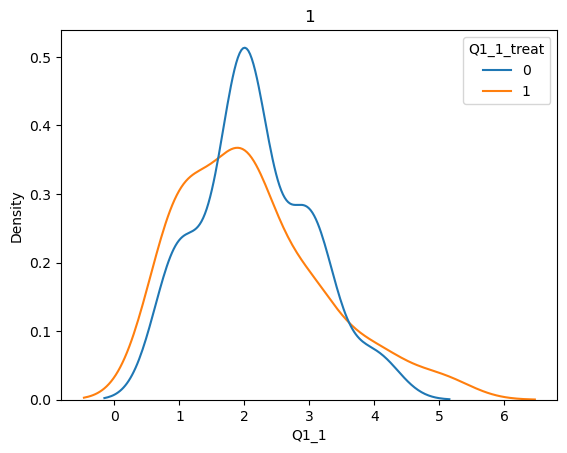

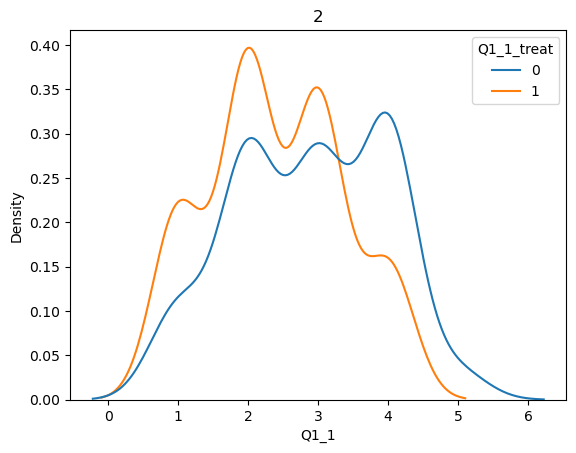

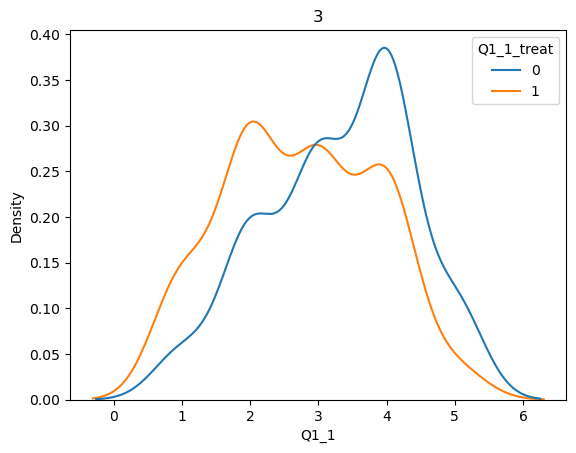

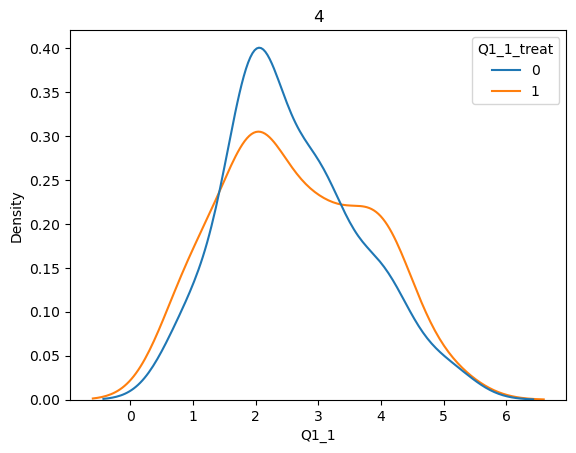

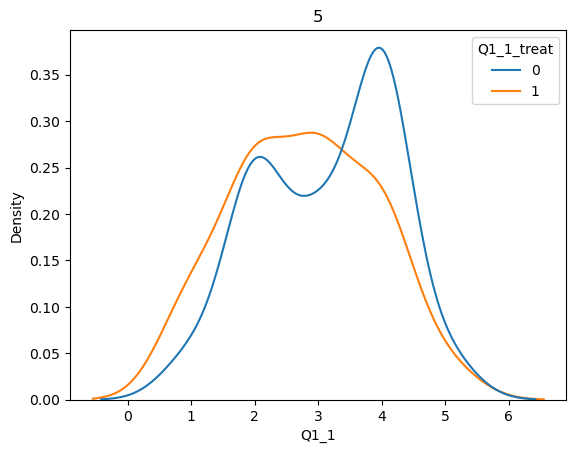

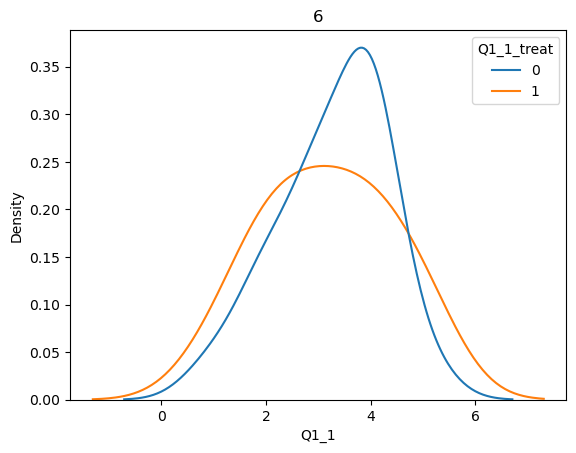

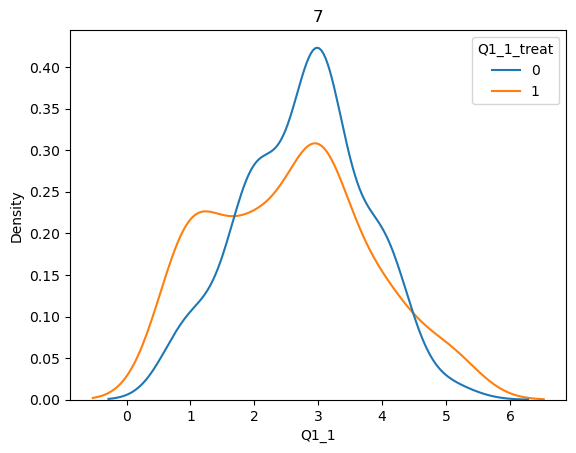

In [17]:
answer_list = list(range(1, 8))


for i in answer_list:
    df_filtrado = data_1[data_1['marielboatlift'] == i]
    sns.kdeplot(data=df_filtrado, x="Q1_1", hue="Q1_1_treat", common_norm=False)
    plt.title(f"{i}")
    plt.show()

#sns.histplot(data=data_1, x="marielboatlift", hue="Q1_1_treat")

In [ ]:
mapeo = {
    7: 1,
    2: 2,
    3: 2,
    4: 3,
    5: 3,
    6: 3,
    1: 4
}

data_1['nueva_columna'] = data_1['x1'].map(mapeo)


In [ ]:
interaction_term = data_1["Q1_1_treat"]*data_1["marielboatlift"]
data_1["interaction"] = interaction_term
rhs = sm.add_constant(data_1[["Q1_1_treat", "marielboatlift"]])
model = sm.OLS(data_1["Q1_1"], rhs)
results = model.fit(cov_type="HC3")


    # realmnte seria un return results y luego la tabla summary se genera en otro .py
results.summary()